# Local Outlier Factor Anomaly Detection

## Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

## Create Dataset

In [12]:
from sklearn.datasets import make_blobs

n_samples = 500
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)

X = make_blobs(centers=[[0, 0], [0, 0]], 
               cluster_std=0.5,
               **blobs_params)[0]

rng = np.random.RandomState(42)

X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

## Local Outlier Factor Algorithm

In [13]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = lof.fit_predict(X)
pred_scores = -1*lof.negative_outlier_factor_

## Visualizing Anomalies

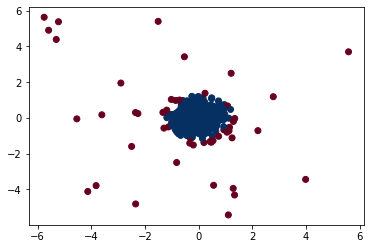

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='RdBu')

## Visualizing Anomaly Scores

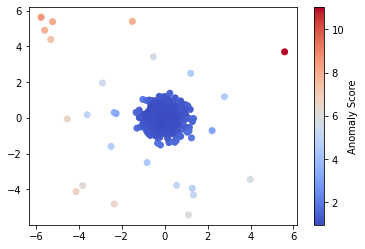

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='coolwarm')
plt.colorbar(label='Anomaly Score')
plt.show()